# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [25]:
!pip install tensorflow
!pip install keras
'''
Por defecto, keras no tira de GPU
'''
#https://playground.tensorflow.org

'\nPor defecto, keras no tira de GPU\n'

Empezamos importando librerías

In [26]:
# Cerrar y abrir VS Code si hace falta
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [27]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [28]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

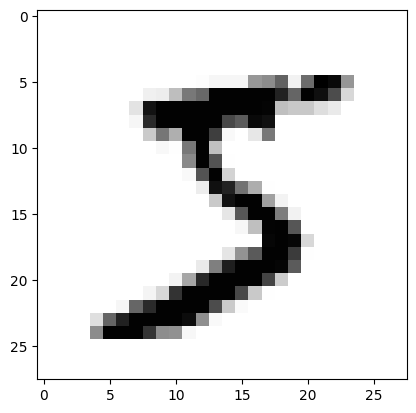

In [30]:
plt.imshow(X_train[0], cmap='Greys');

In [31]:
y_train[0]

5

In [32]:
X_train[25000,12,18]

246

In [33]:
X_train.shape

(60000, 28, 28)

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [34]:
# Preprocess the data (these are NumPy arrays). Aplano a una dimension cada imagen.
# Escalamos ya que vamos a usar gradient descent, y le afecta mucho la escala de las features.
# Ejecutar esta celda solo una vez. Sino reescalará

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [35]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [36]:
# Reserve 10,000 samples for validation. Entraran dentro del modelo para validar. No es validacion cruzada
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(X_val)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


## DEFINICION/CONSTRUCCION

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.  

Es decir vamos a volver a montar esta arquitectura:  
<img src="./img/mlp_clasification.png" alt="drawing" width="300"/>

Un poco más sobre la activación softmax:    

Fórmula:  
<img src="./img/softmax_function.png" alt="drawing" width="150"/>

Función de transferencia:  
<img src="./img/softmax_activation.png" alt="drawing" width="150"/>

Ejemplo de funcionamiento:  
<img src="./img/softmax_example.png" alt="drawing" width="400"/>


In [37]:
# Una manera de declarar la red neuronal

# Siempre hay que declarar la capa sequential para empezar a declarar la red
# Se trata de la API sequential
model = keras.models.Sequential()

# Flatten, aplana en un unico vector. Y especificamos el tamaño de la entrada
# Es como si hiciese un .reshape(-1, 28*28)
# "kernel_initializer" o "bias_initializer" No lo usamos pero seria para inicializar los pesos de otra manera
model.add(keras.layers.Flatten(input_shape=(28,28)))

# Capas de la red. Dense es la capa de neuronas. Necesitamos numero y activacion
model.add(keras.layers.Dense(units = 300, # Numero de neuronas de la capa
                             activation='relu'))

model.add(keras.layers.Dense(100,
                             activation='relu'))

# Capa de salida, con tamaño del número de clases
# Suele ir aqui un softmax. Para multiclase guay. Si es binaria -> sigmoide
model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]
model = keras.models.Sequential(capas)

In [39]:
# Y una forma mediante encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape = (28,28))
flatten_layer = keras.layers.Flatten()(input_layer)
hidden_1 = keras.layers.Dense(300, activation = "relu")(flatten_layer)
hidden_2 = keras.layers.Dense(100, activation = "relu")(hidden_1)
output = keras.layers.Dense(10, activation = "softmax")(hidden_2)
model = keras.Model(inputs = [input_layer], outputs = [output])

Podemos ver las capas, y acceder a sus elementos

In [40]:
print(model.layers[1])
model.layers

<Flatten name=flatten_5, built=True>


[<InputLayer name=input_layer_5, built=True>,
 <Flatten name=flatten_5, built=True>,
 <Dense name=dense_15, built=True>,
 <Dense name=dense_16, built=True>,
 <Dense name=dense_17, built=True>]

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [41]:
hidden1 = model.layers[2]
weights, biases = hidden1.get_weights()

# 784 features (pixeles de las imagenes) x 300 neuronas
# Los pesos están inicializados aleatoriamente
weights.shape

(784, 300)

#### Inicializadores:  
- Los pesos inicializados a cero -> No aprendizaje
- Desde siempre se inicializan "aleatoriamente", pero no sólo de forma uniforme (todos los valores con la misma probabilidad), sino que se emplean diferentes distribuciones de probabilidad con parámetros que dependen del número de entradas y salidas de la capa. El objetivo esintentar que las varianzas de las entradas sean similares a las de las salidas y evitar el problema del gradiente que se desvanece ("Vanishing Gradient" problem):  
    *   Glorot inizialization (por defecto la de Keras, con función uniforme de distribución) -> Para cuando tienes funciones de activación (ninguna, tanh, sigmoid, softmax, aunque también se usa por defecto :-) para casi todo) [Xavier Glorot & Yoshua Bengio]
    *   He inizialization, -> Para cuando tienes ReLU, Leaky ReLU, ELU, GELU, Swish, Mish [He Kaiming et al.]
    *   LeCunn inizialization -> Para cuando tienes SELU [Jean LeCunn]
- Es un hiperparámetro

Establecemos la configuración de ejecución... el compile.

In [42]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    # Stocastic gradient descent. El algoritmo para minimizar la loss function
    # El stocastic va haciendo muestreo en cada evaluacion, no usa todo el dataset
    # Podemos modificar el learning rate(0.01 por defecto) mediante el parametro lr
    optimizer=keras.optimizers.SGD(),  # Optimizer, con parámetros por defecto
    
    
    # Loss function to minimize
    # sparse_categorical_crossentropy cuando tenemos un label en nuna columna
    # Si lo tuviesemos en varias tipo dummy, cogeriamos categorical_crossentropy
    # binary_crossentropy si es una neurona, clasi binario
    loss=keras.losses.SparseCategoricalCrossentropy(),
    
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [43]:
# Equivalente (... casi, los parámetros del optimizador serán los que tenga por defecto)
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [44]:
# Summary
# La primera hidden layer tiene 784 entradas x 300 salidas
# Son los 235500 params = 783x300 + 300 (bias)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### CAPAS

Vayamos construyendo nuestra __lista de capas__ (para guardar en el "Toolbox"):

__Entrenables__:  
__* Dense__ -> Capa completamente conectada a las neuronas de la capa anterior y a la posterior  
    Hiperparámetros asociados:     
        * units: Number of neurons, dimensionality of the output space  
        * activation: Activation function to use. If you don't specify anything, no activation is applied  
        * kernel_initializer: Initializer for the kernel weights matrix.  
        * bias_initializer: Initializer for the bias vector. (Suelen inicializarse a cero)
        * Kernel_regularizar: Los clásicos (L1,L2,...)
 
__Funcionales__:       
__* Input__ -> Capa para definir la forma de la entrada (shape), que se puede pasar como input_shape
__* Flatten__ -> Capa que aplana (convierte su entrada en un vector)

Otras funciones de activación interesantes: SELU (1.67*ELU) y Swish (también SiLU, o Sigmoid linear unit)... No entrar en pánico, vais a usar ReLU, Softmax y no-activation, y en algunos casos (quizás): sigmoid, tanh y las (x)LU (SELU, Siwsh,etc)

<img src="./img/activation_functions.png" alt="drawing" width="600"/>



#### OPTIMIZADORES

##### Ejemplo "sencillo" https://medium.com/@axegggl/newtons-method-for-optimization-in-python-11ce261fcf98

Y también vamos completando lista de hiperparámetros, estos asociados al "Optimizador"/"Modelo":  
Tipo de optimizador:  
* __SGD__, Gradient descent "genérico" (puedes añadirle "momento", es decir que a la hora de descontar el gradiente tenga en cuenta el vector medio de gradientes pasados)
  

* __Adagrad__, Hace gradient descent pero ajusta el gradiente para compensar las componentes de mayor valor numérico (es como evitar irse por las pendientes más inclinadas)... Es decir evita irse a mínimos locales al precio de enlentecer el entrenamiento.    

* __RMSprop__, Versión de AdaGrad, pero considera principalmente los últimos valores del gradiente. Es decir, busca lo bueno de Adagrad reduciendo sus peligros.    

* __Adam__, _Adaptative Moment Estimation_, combina RMSProp y el uso de momento. Es el rey actual (junto con sus versiones) para grandes cantidades de datos.    

* __AdamW, Nadam, AdaMax__, variantes del anterior. 

Comparativa, donde * es malo y *** bueno (extraído del "Hands-on Machine Learning with...." de Aurelien Geron, 3a Edicion)

<img src="./img/Comparativa-optimizadores.png" alt="drawing" width="800"/>

Keras también permite:
__Adadelta__ _(variante de Adagrad)_, __Adafactor__ y __Ftrl__

      
Hiperparámetros Genéricos:
Learning Rate: Coeficiente aplicado al descenso de gradiente, como en otros modelos que ya hemos visto
Asociados al Gradient Clipping: clipnorm, clipvalue, global_clipnorm

Cada optimizador además puede tener sus propios hiperparámetros (ver: https://keras.io/api/optimizers/)

 




### Fuciones de pérdida y métricas
__Función de perdida__: La función a minimizar durante el entrenamiento (son las mismas que en otros modelos no Deep)  
- Clasificación: En clases Keras -> __BinaryCrossEntropy, CategoricalCrossEntropy, SparseCategoricalCrossEntropy__  
- Regresión: En clases Keras -> __MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, CosineSimilarity__   

__Métricas__:  
- Regresión: __MAE, MSE, MAPE__ :-)  
- Clasificación: __Accuracy, Precision, Recall, f1, AuRoC__  

¿Cuál es la diferencia entre Categorical y Sparse? ¿Por qué las funciones de pérdida son diferentes a las métricas en Clasificación? 

## ENTRENAMIENTO

Entrenamos el modelo. Usamos los datos de entrenamiento. El __batch_size__ es la cantidad de muestras que utiliza el SGD, y las __epochs__ son las iteraciones que realiza en el entrenamiento. (Son hiperparámetros de entrenamiento)    

En una epoch se entrenan tantos batches como sea necesario para recorrer todo el dataset.

In [45]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64, # numero de muestras empleadas en el entrenamiento de SGD
    epochs=15, # 1 por defecto. Insuficiente. Numero de vueltas del backpropagation
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.1
    validation_data=(X_val, y_val)
)
'''
En el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.
Si vemos que ya no baja mas, no serán necesarias tantas epochs.
Imprimera tantas lineas como epochs hayamos puesto

Tampoco usamos el class_weight, que le da más peso a las clases con pocas muestras
Util para datasets desbalanceados.

El loss que muestra es el categoricalcrossentropy
'''


Fit model on training data
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6272 - loss: 1.4000 - val_accuracy: 0.8979 - val_loss: 0.3984
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8918 - loss: 0.4004 - val_accuracy: 0.9146 - val_loss: 0.3057
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.3265 - val_accuracy: 0.9248 - val_loss: 0.2662
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2830 - val_accuracy: 0.9309 - val_loss: 0.2414
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9278 - loss: 0.2549 - val_accuracy: 0.9379 - val_loss: 0.2214
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2327 - val_accuracy: 0.9422 - val_loss: 0.2061
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9398 - loss: 0.2159 - val_accuracy: 0.9489 - val_loss: 0.1895
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss

'\nEn el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.\nSi vemos que ya no baja mas, no serán necesarias tantas epochs.\nImprimera tantas lineas como epochs hayamos puesto\n\nTampoco usamos el class_weight, que le da más peso a las clases con pocas muestras\nUtil para datasets desbalanceados.\n\nEl loss que muestra es el categoricalcrossentropy\n'

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [46]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val)
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1281 - val_accuracy: 0.9641 - val_loss: 0.1289
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1193 - val_accuracy: 0.9650 - val_loss: 0.1251
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1126 - val_accuracy: 0.9660 - val_loss: 0.1213
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1100 - val_accuracy: 0.9669 - val_loss: 0.1186
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1063 - val_accuracy: 0.9669 - val_loss: 0.1164
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.1007 - val_accuracy: 0.9684 - val_loss: 0.1152
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0987 - val_accuracy: 0.9694 - val_loss: 0.1123
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0925 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [47]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 'auto', 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'accuracy': [0.7829599976539612,
  0.896120011806488,
  0.9128400087356567,
  0.9225199818611145,
  0.9292799830436707,
  0.9353799819946289,
  0.9405999779701233,
  0.9438999891281128,
  0.9477400183677673,
  0.950439989566803,
  0.9525600075721741,
  0.9561399817466736,
  0.9583600163459778,
  0.9601200222969055,
  0.9627400040626526],
 'loss': [0.8974539637565613,
  0.37788301706314087,
  0.31123602390289307,
  0.2747615575790405,
  0.24883617460727692,
  0.22856050729751587,
  0.21128809452056885,
  0.19654913246631622,
  0.18410569429397583,
  0.17303436994552612,
  0.16326501965522766,
  0.15448084473609924,
  0.14595746994018555,
  0.13866876065731049,
  0.1317824423313141],
 'val_accuracy': [0.8978999853134155,
  0.9146000146865845,
  0.9247999787330627,
  0.930899977684021,
  0.9379000067710876,
  0.9422000050544739,
  0.9488999843597412,
  0.9506000280380249,
  0.9532999992370605,
  0.95660001039505,
  0.9575999975204468,
  0.9607999920845032,
  0.9613999724388123,
  0.96200

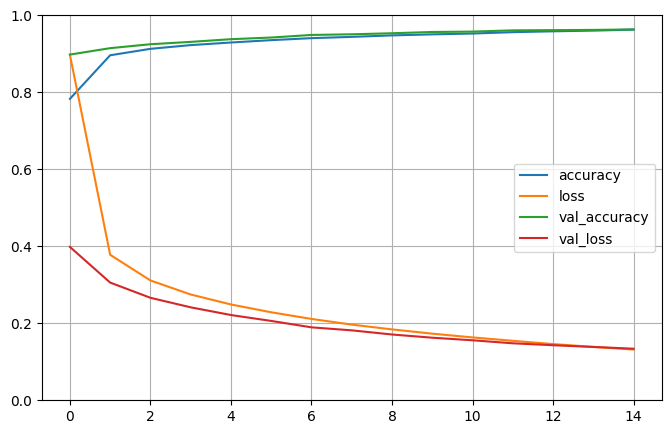

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [49]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9665 - loss: 0.1125
test loss, test acc: [0.0955900028347969, 0.9714999794960022]


C:\Users\pabma\AppData\Local\Temp\ipykernel_11748\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


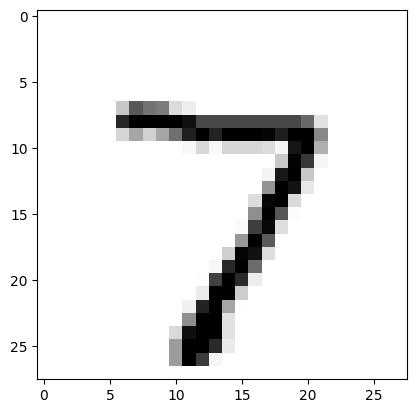

In [50]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [51]:
'''
Ojo aqui viene slicing xq presupone que le entran varios inputs
Nos da las probabilidades de pertenecer a una clase u otra.
'''
predictions = model.predict(X_test[:1]).round(3)
print("predictions shape:", predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
predictions shape: (1, 10)
[0.    0.    0.    0.003 0.    0.    0.    0.996 0.    0.   ]
7


In [52]:
predictions.max()

0.996

In [53]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [54]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [55]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.
     
Vamos a configurar una red como esta:  
<img src="./img/mlp_regresion.png" alt="drawing" width="300"/>

In [57]:
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation="relu",
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # una unica neurona de salida
    # Sin fun de activa. ReLu no iria mal si el output es positivo. Sigmoide si esta acotado.
])

model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics = ["RootMeanSquaredError"])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)


Epoch 1/20


c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.0670 - loss: 1.2044 - val_RootMeanSquaredError: 0.7428 - val_loss: 0.5518
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - RootMeanSquaredError: 0.7111 - loss: 0.5061 - val_RootMeanSquaredError: 0.6633 - val_loss: 0.4400
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - RootMeanSquaredError: 0.6762 - loss: 0.4577 - val_RootMeanSquaredError: 0.6493 - val_loss: 0.4216
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - RootMeanSquaredError: 0.6374 - loss: 0.4066 - val_RootMeanSquaredError: 0.6383 - val_loss: 0.4074
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - RootMeanSquaredError: 0.6369 - loss: 0.4058 - val_RootMeanSquaredError: 0.6314 - val_loss: 0.3988
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - RootMeanSquaredError: 0.6263 - loss: 0.3925 - val_RootMeanSquaredError: 0.6289 - val_loss: 0.3956
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - RootMeanSquaredError: 0.6412 - lo

In [58]:
print("MSE:",mse_test)

MSE: [0.37658920884132385, 0.6137462258338928]


In [59]:
#Otra forma pure-Keras:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)


norm_layer = keras.layers.Normalization(input_shape = X_train.shape[1:]) # Es una Standardization
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    norm_layer,
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1) # una unica neurona de salida
    # Sin fun de activa. ReLu no iria mal si el output es positivo. Sigmoide si esta acotado.
])
optimizer = keras.optimizers.SGD()
model.compile(loss="mean_squared_error",
              optimizer=optimizer, metrics = ["RootMeanSquaredError","MeanAbsoluteError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20


c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - MeanAbsoluteError: 0.8556 - RootMeanSquaredError: 1.4114 - loss: 2.0538 - val_MeanAbsoluteError: 0.5327 - val_RootMeanSquaredError: 0.7504 - val_loss: 0.5632
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - MeanAbsoluteError: 0.5209 - RootMeanSquaredError: 0.7264 - loss: 0.5279 - val_MeanAbsoluteError: 0.5025 - val_RootMeanSquaredError: 0.7089 - val_loss: 0.5027
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - MeanAbsoluteError: 0.4833 - RootMeanSquaredError: 0.6690 - loss: 0.4480 - val_MeanAbsoluteError: 0.4958 - val_RootMeanSquaredError: 0.6887 - val_loss: 0.4743
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - MeanAbsoluteError: 0.4717 - RootMeanSquaredError: 0.6608 - loss: 0.4370 - val_MeanAbsoluteError: 0.4817 - val_RootMeanSquaredError: 0.6666 - val_loss: 0.4443
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - MeanAbsoluteError: 0.4745 - RootMeanSquaredError: 0.6623 - loss: 0.4389 - val_MeanAbsoluteError: 0.47

In [60]:
print("MSE:",mse_test)

MSE: [0.38239651918411255, 0.4397435784339905, 0.6177532076835632]


Nueva capa al toolbox:

Funcionales:  
__Normalize__: keras.layers.Normalization -> Nos hace la standardizacion de la entrada 
Hay que ejecutar el metodo Adapt antes de llamar al fit del modelo que incluya la capa

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [61]:
model.save("my_keras_model.keras")

In [62]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

Otra forma es emplear el formato TensorFlow. En este caso crea un directorio con varios ficheros que facilita el despliegue en algunas aplicaciones (ojo, que habría que llevar a producción todo el directorio)

In [63]:
model.save("my_keras_model_otro.keras")

In [64]:
# Lo volvemos a cargar
model_k= keras.models.load_model("my_keras_model_otro.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [65]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - MeanAbsoluteError: 0.4259 - RootMeanSquaredError: 0.5939 - loss: 0.3530
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - MeanAbsoluteError: 0.4317 - RootMeanSquaredError: 0.6227 - loss: 0.3879
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - MeanAbsoluteError: 0.4263 - RootMeanSquaredError: 0.5999 - loss: 0.3603
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - MeanAbsoluteError: 0.4233 - RootMeanSquaredError: 0.6010 - loss: 0.3620
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - MeanAbsoluteError: 0.4292 - RootMeanSquaredError: 0.6060 - loss: 0.3673
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - MeanAbsoluteError: 0.4216 - RootMeanSquaredError: 0.5962 - loss: 0.3557
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - MeanAbsoluteError: 0.4188 - RootMeanSquaredError: 0.5911 - loss: 0.3497
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - MeanAbsoluteError: 0.4251 - RootMeanSquaredError

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [66]:
'''
10 esta bien. Lo pondemos a 5 para el ejercicio
¿Qué considera como dejar de mejorar? parametros min_delta y baseline
'''
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - MeanAbsoluteError: 0.4053 - RootMeanSquaredError: 0.5766 - loss: 0.3326 - val_MeanAbsoluteError: 0.4208 - val_RootMeanSquaredError: 0.5991 - val_loss: 0.3589
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - MeanAbsoluteError: 0.4018 - RootMeanSquaredError: 0.5758 - loss: 0.3317 - val_MeanAbsoluteError: 0.4221 - val_RootMeanSquaredError: 0.6033 - val_loss: 0.3639
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - MeanAbsoluteError: 0.4082 - RootMeanSquaredError: 0.5844 - loss: 0.3418 - val_MeanAbsoluteError: 0.4237 - val_RootMeanSquaredError: 0.5984 - val_loss: 0.3581
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - MeanAbsoluteError: 0.4087 - RootMeanSquaredError: 0.5813 - loss: 0.3380 - val_MeanAbsoluteError: 0.4213 - val_RootMeanSquaredError: 0.6009 - val_loss: 0.3610
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - MeanAbsoluteError: 0.4066 - RootMeanSquaredError: 0.5773 - loss: 0.3334 - val_MeanA

## Hiperparámetros y tuning

Guía "casera":

1- Recetas (adaptada de "Hands-on...")  PARA MLPs!!!!    
    * Capas:   
        - Empezar con una capa oculta e ir añadiendo (dependiendo de la complejidad del problema, probar wide & deep)
        - Si pocas features -> más neuronas  (aumentar la combinación de features) (num_features < 100) [Orientativo]  
        - Si muchas features  -> menos neuronas (proyección tipo PCA) (num_features > 1000) [Orientativo] e ir aumentando en capas sucesivas
        - O empezar con muchas (doble de tus features e ir "estrechando los pantalones")  
        - Construcción en prisma o pirámide (para empezar)  
        - Inicialización: Empezar con Glorot, cambiar a He  
        - Activación: ReLU salvo la última, si muchas capas probar -> SELU o Swish (con el inicializador a LeCunn) 
    * Optimizadores:   
        - Si muchos datos*features -> Adam o AdamW con sus valores por defecto  
        - Si no, SGD con Nesterov activado, y momento a 0.9  
        - Learning rate -> 0.001-0.0001 para empezar e ir creciendo (learning-rate warm-up) (Si te atreves, buscar adaptative learning rate y optimizar con esto)  
    * Entrenamiento:  
        - Epoch, probar con pocas para ver duración -> Epochs altas y Callback de Early Stop activado  
        - Batch_Size -> 32, si tienes muchos datos y una GPU a mano puedes subir mucho 64,128,256...
    * Regularización (lo veremos):  
        - Dropout al 0.25-0.5 (sin SELU)



2- Pasos  
    - Si overfitting -> Regularizar: Earlystopping, Dropout (lo veremos en la siguiente sección)  
    - Comprobar underfitting -> Aumentar epochs, aumentar batch_size  
    - Jugar con optimizador: learning rate (de pequeño a grande), tipo de optimizador   
    - Jugar con número de capas (ojo al overfitting) y las funciones de activación y la inicialización de pesos  
    - Jugar con el número de neuronas por capa (suele ser piramide o prisma, pero puedes jugar a expandir dimensiones)  
    - Combinar los dos anteriores  

3- Keras Tuner:
    https://keras.io/guides/keras_tuner/

## Herramientas adicionales

### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [67]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [68]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - MeanAbsoluteError: 0.3995 - RootMeanSquaredError: 0.5683 - loss: 0.3231 - val_MeanAbsoluteError: 0.4072 - val_RootMeanSquaredError: 0.5902 - val_loss: 0.3483
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanAbsoluteError: 0.4029 - RootMeanSquaredError: 0.5970 - loss: 0.3575 - val_MeanAbsoluteError: 0.4144 - val_RootMeanSquaredError: 0.5973 - val_loss: 0.3567
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanAbsoluteError: 0.3977 - RootMeanSquaredError: 0.5668 - loss: 0.3213 - val_MeanAbsoluteError: 0.4079 - val_RootMeanSquaredError: 0.5923 - val_loss: 0.3508
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanAbsoluteError: 0.3947 - RootMeanSquaredError: 0.5671 - loss: 0.3217 - val_MeanAbsoluteError: 0.4117 - val_RootMeanSquaredError: 0.5900 - val_loss: 0.3481
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanAbsoluteError: 0.3961 - RootMeanSquaredError: 0.5640 - loss: 0.3183 - val_MeanAbsoluteError: 0

In [69]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''

'\nPara lanzarlo desde el jupyter notebook\n%load_ext tensorboard\n%tensorboard --logdir=./my_logs --port=6006\n\nPara lanzarlo desde el terminal, hay que estar en la carpeta de los logs\ntensorboard --logdir=./my_logs --port=6006\n\n'